<a href="https://colab.research.google.com/github/juanC0627/aLATAM/blob/main/DESAFIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESAFIOS
1. PROMEDIO DE AREA DE TODOS LOS BARRRIOS TOP 10
2. CONSULTAR OTROS DATOS ESTADISTICOS, CONTEO, MEDIANA, VALORES MINIMOS Y MAXIMOS

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd

inmuebles = pd.read_csv("/content/drive/MyDrive/CLASES DE aLATAM/inmuebles_bogota.csv")
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [3]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)

In [5]:
inmuebles.shape

(9520, 8)

DESAFIO #1

In [10]:
inmuebles.groupby("Barrio")["Area"].mean().reset_index().sort_values(by="Area",ascending=False).head(10)


,Barrio,Area
92,Modelia,4316.750000
83,Libertador,642.000000
11,Bosa Piamonte,400.000000
73,La Soledad,378.625000
114,Restrepo,336.500000
127,Santa Librada,328.000000
80,Las Ferias,320.000000
124,Santa Ana,309.375000
141,Veraguas,302.666667
7,Bellavista Occidental,286.200000


<Axes: title={'center': 'Promedio de areas por barrios'}, ylabel='Barrio'>

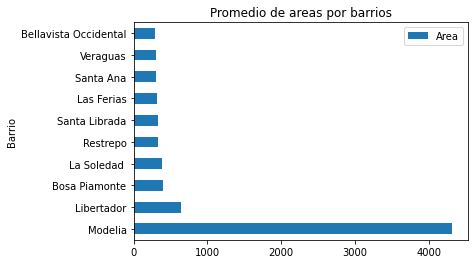

In [14]:
grupo=inmuebles.groupby("Barrio")["Area"].mean().reset_index().sort_values(by="Area",ascending=False)
top10=grupo.head(10)
top10.set_index('Barrio', inplace=True)
top10.plot(kind = 'barh',title='Promedio de areas por barrios')

DESAFIO #2

In [17]:
inmuebles.Tipo == "Casa"

0       False
1        True
2       False
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518     True
9519    False
Name: Tipo, Length: 9520, dtype: bool

In [18]:
sum(inmuebles.Tipo == "Casa")

2043

In [19]:
precios_casa = (inmuebles.Tipo == "Casa")
precios_casa

0       False
1        True
2       False
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518     True
9519    False
Name: Tipo, Length: 9520, dtype: bool

<Axes: >

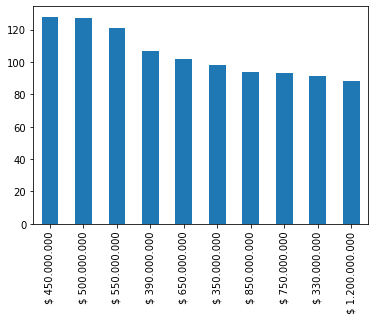

In [28]:
inmuebles_venta = inmuebles.Valor.value_counts()
inmuebles_venta.head(10).plot.bar()

In [30]:
inmuebles["Valor"].describe()

count              9520
unique             1039
top       $ 450.000.000
freq                128
Name: Valor, dtype: object